Contents

1. The Avito Kaggle Challenge: understanding the competition and reading in data
2. Define functions for this machine learning exerise
3. Preprocess train data using the defined functions
4. Model building, hyperparameter tuning, and some exploratory data analysis (EDA)
5. Test out your model

# 1. The Avito Kaggle Challenge: understanding the competition and reading in data

'''Please visit the Kaggle website for this competition to learn more.
https://www.kaggle.com/c/avito-demand-prediction#evaluation. Our goal is to predict demand
for an online ad. We need to predict a continuous variables, deal probability, and the
metric for performance is root mean squared error. This is a great big data, regression
problem for our class. The train and test data are given s separate datasets'''

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline

In [2]:
%pwd # this line is optional, and will output differently for you!

'/Users/qing/Desktop/study/data science/module 7'

In [4]:
path = '/Users/qing/Desktop/study/data science/module 7' # Change this based on cell 2's output

In [5]:
!ls '/Users/qing/Desktop/study/data science/module 7/Avito_kaggle' # Make sure you have these two files in your folder

test.csv  train.csv


In [7]:
'''Read in training data'''
avi_df_raw = pd.read_csv(f'{path}/Avito_kaggle/train.csv',parse_dates = ["activation_date"])
print(avi_df_raw.shape)
avi_df_raw.head()

(1503424, 18)


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [11]:
#Sort data by date since we want to later split validation data

avi_df_raw.sort_values(by = "activation_date",inplace = True)
print(avi_df_raw.head(3))

             item_id       user_id                 region             city  \
751711  3b896605f03c  9457abfa0ebf      Самарская область           Самара   
952592  513bf7762ab0  6498638f973e           Башкортостан              Уфа   
952586  126368a52d67  180b5611df6e  Нижегородская область  Нижний Новгород   

       parent_category_name              category_name             param_1  \
751711          Личные вещи     Детская одежда и обувь       Для мальчиков   
952592  Бытовая электроника                   Телефоны  Номера и SIM-карты   
952586          Личные вещи  Одежда, обувь, аксессуары      Мужская одежда   

               param_2              param_3                           title  \
751711  Верхняя одежда  86-92 см (1-2 года)               Зимний комбенизон   
952592             NaN                  NaN                  Домашний номер   
952586  Верхняя одежда            44–46 (S)  Продаю мужскую куртку весеннюю   

                                              description

In [12]:
avi_df_raw.tail(2)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
900078,120b3ed59794,ea9a1db6e543,Новосибирская область,Новосибирск,Транспорт,Автомобили,С пробегом,Volkswagen,Golf,"Volkswagen Golf, 2000",Продам свой гольф-вагон. Хорошее состояние. Зи...,180000.0,34,2017-04-03,Private,58dc43987f7b42214e52924618cf9ce8014c6dbacb8239...,1108.0,0.7376
187627,adcdea90afc7,723cf5bd2a7d,Ярославская область,Ярославль,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2115 Samara,"ВАЗ 2115 Samara, 2012","• Эксплуатация 2012 г., по ПТС 2011 г.в./\n • ...",119500.0,2145,2017-04-07,Shop,NaN,NaN,0.7376


In [14]:
avi_df_raw.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [15]:
avi_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503424 entries, 751711 to 187627
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null datetime64[ns]
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: dat

# 2. Define functions for this machine learning exerise

In [16]:
'''Define functions to preprocess data - split dates, categorize, impute'''

def split_dates(df,date_column):
    date_df = pd.DataFrame({"year": df[date_column].dt.year,
              "month": df[date_column].dt.month,
              "day": df[date_column].dt.day,
              "dayofyear": df[date_column].dt.dayofyear,
              "week": df[date_column].dt.week,
              "weekofyear": df[date_column].dt.weekofyear,
              "dayofweek": df[date_column].dt.dayofweek,
              "weekday": df[date_column].dt.weekday,
              "quarter": df[date_column].dt.quarter,
             })
    df = df.drop(date_column,axis = 1)
    df = pd.concat([df,date_df],axis = 1)
    return df

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [17]:
'''Define functions to split data, measure accuracy, and r-squared'''
#split
def split_df(df,num):
    return df[ :num].copy(),df[num: ].copy()

#Root-mean-square deviation
def my_rmse(y1,y2):
    return np.sqrt(((y1-y2)**2).mean())
#r-squared
def rsq_n_rmse(my_model,x_train,y_train,x_val,y_val):
    result = [my_model.score(x_train,y_train),my_model.score(x_val,y_val),
             my_rmse(my_model.predict(x_train),y_train),my_rmse(my_model.predict(x_val),y_val)]
    return "train rsq,val rsq,train rmse, val rmse", result


# 3. Preprocess train data using the defined functions

In [18]:
avi_df_raw1 = split_dates(avi_df_raw,"activation_date")
print(avi_df_raw1.shape)

(1503424, 26)


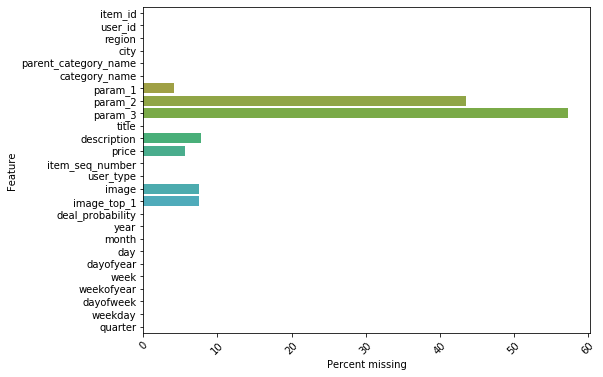

In [19]:
'''First, calculate the percentage of missing values for every column, and 
plot them as a bar chart'''

null_vals = avi_df_raw1.isnull().sum()/len(avi_df_raw1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

'''It looks like param1 and param2 columns contain many null values. In the first
pass, we'll keep them and impute'''

In [14]:
avi_df_raw2 = str_to_cat(avi_df_raw1)
print(avi_df_raw2.shape)
avi_df_raw2.head(3)

(1503424, 26)


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,deal_probability,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter
751711,3b896605f03c,9457abfa0ebf,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,86-92 см (1-2 года),Зимний комбенизон,...,0.0,2017,3,15,74,11,11,2,2,1
889369,c81c34d3aac5,0b161da2b144,Иркутская область,Братск,Бытовая электроника,Телефоны,Аксессуары,Чехлы и плёнки,NaN,Чехол для айфона 6s,...,0.0,2017,3,15,74,11,11,2,2,1
175952,a8ab6225dd06,93d527a1ca66,Пермский край,Краснокамск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,44–46 (M),Продам кожанную куртку,...,0.0,2017,3,15,74,11,11,2,2,1


In [15]:
avi_df_raw3,my_table = mydf_preprocessor(avi_df_raw2,null_table = None)
print(avi_df_raw3.shape)
avi_df_raw3.head(3)

(1503424, 28)


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter,price_na,image_top_1_na
751711,348938,447528,18,1301,5,11,110,122,186,261804,...,3,15,74,11,11,2,2,1,False,False
889369,1175228,33441,7,232,1,42,41,262,0,754605,...,3,15,74,11,11,2,2,1,False,False
175952,991010,446030,16,729,5,30,126,122,144,562387,...,3,15,74,11,11,2,2,1,False,False


In [16]:
my_table

{'image_top_1': 1057.0, 'price': 1300.0}

In [17]:
x = avi_df_raw3.drop('deal_probability', axis=1)
y = avi_df_raw3['deal_probability']

In [18]:
'''Since this dataset is large, let's use a subset to tune hyperparamters. This works well.
We use the underscore,_, to collect discardable data like in the split below'''
x_sub,_ = split_df(x,200000)
y_sub,_ = split_df(y,200000)

In [19]:
'''Now, split the smaller subset into train and validation sets'''

x_trn,x_val = split_df(x_sub,150000)
y_trn,y_val = split_df(y_sub,150000)

In [20]:
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)

(150000, 27) (50000, 27) (150000,) (50000,)


# 4. Model building, hyperparameter tuning, and some exploratory data analysis (EDA)

In [21]:
#my_model = RandomForestRegressor(n_jobs = -1,oob_score = False,n_estimators = 10)
mod_1 = RandomForestRegressor(n_jobs = -1,oob_score = False,n_estimators = 50,
                                   max_depth = 40000,min_samples_leaf = 25)


In [22]:
#Fit the model
mod_1.fit(x_trn,y_trn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40000,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
#test out rsq_n_rmse function
rsq_n_rmse(mod_1,x_trn,y_trn,x_val,y_val)

('train rsq,val rsq,train rmse, val rmse',
 [0.3437370261950804,
  0.20275741956815274,
  0.2102004976608971,
  0.2324801699672255])

"train rsq > val rsq": overfit
train rmse similarly equals val rmse: pretty cool but it still can be tuned

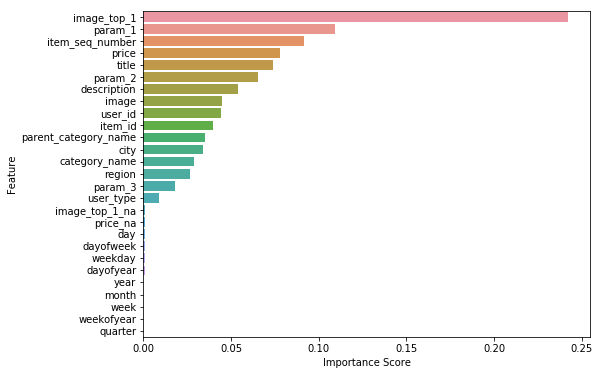

In [24]:
'''Calculate feature importance scores with your model'''

feat_imps = pd.DataFrame(mod_1.feature_importances_, index = x_trn.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

feature selection
1. Remove features with very small feature importance values
2. Re-run model
3. Do this iteratively and see if we get performance improvements.
4. Remember smaller the rmse value and greater the R Squared, the better!

# 5. Test out your model

In [25]:
'''Read in test data'''
avito_test_raw = pd.read_csv(f'{path}/Avito_kaggle/test.csv',parse_dates = ["activation_date"])
print(avito_test_raw.shape)
avito_test_raw.head(2)

(508438, 17)


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN


In [26]:
'''Preprocess this data in exactly the same way. Step I extract data terms'''

avito_test_raw1 = split_dates(avito_test_raw,"activation_date")
print(avito_test_raw1.shape)

(508438, 25)


In [27]:
'''Step II: Apply string to category mapping function'''
avito_test_raw2 = str_to_cat(avito_test_raw1)
print(avito_test_raw2.shape)
avito_test_raw2.head(3)

(508438, 25)


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,image_top_1,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,...,2020.0,2017,4,18,108,16,16,1,1,2
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,...,NaN,2017,4,16,106,15,15,6,6,2
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,...,2960.0,2017,4,17,107,16,16,0,0,2


In [28]:
'''Step III: complete the proprocessing by imputing null values'''
avito_test_raw3,my_table1 = mydf_preprocessor(avito_test_raw2,null_table = my_table)
print(avito_test_raw3.shape)
avito_test_raw3.head(3)

(508438, 27)


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter,price_na,image_top_1_na
0,201001,262939,5,307,5,11,108,177,63,181529,...,4,18,108,16,16,1,1,2,True,False
1,201930,55146,20,934,9,6,117,0,0,210003,...,4,16,106,15,15,6,6,2,False,True
2,277593,13650,13,148,1,3,310,0,0,18021,...,4,17,107,16,16,0,0,2,False,False


In [29]:
avito_test_raw3.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'user_type', 'image',
       'image_top_1', 'year', 'month', 'day', 'dayofyear', 'week',
       'weekofyear', 'dayofweek', 'weekday', 'quarter', 'price_na',
       'image_top_1_na'],
      dtype='object')

In [30]:
'''Predictions for the test set'''
y_tst_pred = mod_1.predict(avito_test_raw3)

1.Use Kaggle to find out how well we did